In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import h5py
import torch
print(os.getpid())
plt.style.use('dark_background')


2078426


In [2]:
# ChromAn ris_availabled imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive
from ChromAn.src.spot_tools.spot_class import Spots3D

In [3]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_1day/'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_1day/
-- 1 folders, 326 fovs detected.


In [4]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'color_usage_clearing.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_1day/Analysis/color_usage_clearing.csv


In [5]:
from ChromAn.src.spot_tools.partition_spots import Spots_Partition
# match spots:
from scipy.spatial.distance import cdist
from ChromAn.src.spot_tools.match_spots import colocalize_spots

In [16]:
kept_spots_748.to_coords() - kept_spots_637.to_coords()

array([[ 8.50009918e-03, -7.32421875e-02,  4.88281250e-02],
       [ 1.81865692e-03, -2.94189453e-01, -3.36669922e-01],
       [ 2.05049515e-02, -3.66210938e-04, -9.64355469e-02],
       [ 2.95071602e-02, -2.08740234e-01,  3.53149414e-01],
       [-1.40809917e+01,  5.83740479e+02, -8.73585449e+02],
       [-2.61068344e-02,  1.10656738e-01,  5.68847656e-02],
       [ 1.02577209e-02, -2.04956055e-01,  1.27807617e-01],
       [-1.53217316e-02,  3.83300781e-02,  1.41937256e-01],
       [ 3.38592529e-02, -5.93261719e-02,  1.01684570e-01],
       [ 2.00217152e+00, -2.84587402e+02,  1.69216565e+03],
       [ 1.10359192e-02,  1.43371582e-01,  4.39453125e-02],
       [ 2.87494659e-02,  6.33544922e-02,  1.05224609e-01],
       [-4.07234144e+00, -8.15984619e+02,  1.36046228e+03],
       [-8.92696381e-02,  2.16064453e-01, -1.36474609e-01],
       [-6.08062744e-03,  7.04345703e-02,  6.65283203e-02],
       [-1.41468048e-02, -7.66601562e-02,  2.72216797e-02],
       [-2.09739799e+01,  7.08072998e+02

In [17]:
fov_2_info = {}
for _fov_id, _fov_name in enumerate(fovs):
    _fov_filename = os.path.join(folders[0], fovs[_fov_id])
    _save_filename = _fov_filename.replace('.dax', '.hdf5')
    
    # load spots, dapi_im and segmentation mask:
    try:
        with h5py.File(_save_filename, 'r') as _f:
            _spots_748 = Spots3D(_f['H0M1/748/spots'][:], pixel_size=[500,107,107])
            _spots_637 = Spots3D(_f['H0M1/637/spots'][:], pixel_size=[500,107,107])
            #_im_748 = _f['H0M1/748/im'][:]
            #_im_637 = _f['H0M1/637/im'][:]
            #_dapi_im = _f['H0M1/405/im'][:]
            _dna_mask = _f['dapi_mask'][:]
    except:
        continue
    #kept_spots_748, kept_spots_637 = colocalize_spots(_spots_748, _spots_637, threshold=300)

    # Search for segmentation label
    _label_748 = Spots_Partition.spots_to_labels(
        _dna_mask, _spots_748, #kept_spots_748, 
        search_radius=5, 
        verbose=True,
    )

    # Search for segmentation label
    _label_637 = Spots_Partition.spots_to_labels(
        _dna_mask, _spots_637, #kept_spots_637, 
        search_radius=5, 
        verbose=True,
    )
    #num_positive = len(np.unique(_label_748)[np.unique(_label_748) >= 0])
    #num_positive = len(np.unique(_label_637)[np.unique(_label_637) >= 0])
    
    union = np.union1d(np.unique(_label_748)[np.unique(_label_748) >= 0], np.unique(_label_637)[np.unique(_label_637) >= 0])
    print(union)
    num_positive = len(union)
    num_total = np.max(_dna_mask)
    # append
    fov_2_info[_fov_id] = {
        'num_positive': num_positive,
        'num_total': num_total,
    }
    print(_fov_id, num_positive, num_total)
    

-- partition barcodes for 129 spots
-- partition barcodes for 143 spots
[ 1  2  3  4  7  8 10 12 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 35 37 39 40 41 42 43 44 45 46 48 49 50 51 52 53 54 55 56 57 59 60
 61 62 63 64 65 67 70 73 74 75 76 85 86 89]
0 62 94
-- partition barcodes for 89 spots
-- partition barcodes for 97 spots
[ 1  2  6  7  9 10 11 12 13 14 17 18 19 21 23 24 26 27 28 29 30 31 32 33
 34 36 38 39 40 41 42 43 44 46 48 50 54 55 57 58 60 62 63 67]
1 44 71
-- partition barcodes for 45 spots
-- partition barcodes for 48 spots
[ 8  9 10 12 14 15 17 20 22 27 28 30 33 35 42 46 50 51 54 59 62 68 70 72
 73 74]
2 26 83
-- partition barcodes for 129 spots
-- partition barcodes for 147 spots
[  1   2   3   4   7  11  12  13  15  16  17  19  21  25  28  29  31  32
  33  35  36  39  40  41  45  46  47  49  54  55  56  57  58  59  60  61
  63  67  68  70  71  73  74  75  76  77  79  80  81  86  87  88  90  91
  92  96  98  99 100 101 103 107 108 109 112 115 118 126 129]
3 69 

-- partition barcodes for 49 spots
-- partition barcodes for 80 spots
[ 2  6  7  9 13 15 17 18 19 20 21 22 23 24 25 28 29 30 31 32 33 37 38 39
 40 41 43 44 45 46 50 51 52 53 54 55 56 59 60 61 62 64 66 67 68 69 70 72
 76]
36 49 85
-- partition barcodes for 127 spots
-- partition barcodes for 150 spots
[ 2  3  4  5  6  9 11 12 13 15 16 17 19 20 21 22 24 27 28 31 33 34 35 36
 38 40 41 42 43 44 45 46 47 49 50 51 52 56 60 62 63 66 67 70 73 77 81 82]
37 48 88
-- partition barcodes for 129 spots
-- partition barcodes for 126 spots
[ 2  3  4  6  7  8 10 11 12 15 16 17 18 19 20 21 22 23 26 27 28 29 30 32
 33 34 35 37 39 40 41 43 45 47 48 49 51 60 72 88]
38 40 105
-- partition barcodes for 99 spots
-- partition barcodes for 99 spots
[ 1  2  3  4  5  6  8  9 10 15 18 19 21 22 23 24 25 26 28 30 32 35 36 38
 40 41 42 45 47 48 53 54 58 62 75 78 91]
39 37 103
-- partition barcodes for 102 spots
-- partition barcodes for 126 spots
[  3   4   5   7   8   9  16  17  18  19  21  22  24  26  27  30  31  3

-- partition barcodes for 163 spots
-- partition barcodes for 179 spots
[ 1  2  3  4  5  7  8  9 10 13 15 16 18 21 22 24 26 27 28 30 32 33 35 36
 37 38 39 41 42 43 44 46 47 48 49 50 51 52 53 54 55 56 57 60 61 63 65 66
 67 70 71 72 74 76 79 80 87 93 94]
73 59 106
-- partition barcodes for 129 spots
-- partition barcodes for 143 spots
[ 1  3  4  6  7  8 10 13 14 15 18 19 20 21 23 25 26 27 28 29 30 32 33 34
 37 38 40 41 42 45 46 49 50 51 52 53 54 55 57 58 59 60 63 65 66 67 68 70
 72 73 74 76 77 80 81 82 83 86 90 95 98]
74 61 99
-- partition barcodes for 167 spots
-- partition barcodes for 164 spots
[  2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  22  25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42
  43  44  45  47  48  52  55  57  59  60  65  67  74  77  80  83  87  90
  92  96  99 106 115]
75 59 126
-- partition barcodes for 110 spots
-- partition barcodes for 117 spots
[ 1  2  3  5  6  7  8  9 10 11 12 13 15 16 17 21 22 23 24 26 28 29 30 31
 

-- partition barcodes for 156 spots
-- partition barcodes for 158 spots
[ 4  5  6  7 10 11 12 13 15 16 17 18 19 20 21 22 23 27 28 31 34 44 51 56
 64 66 74 79]
109 28 82
-- partition barcodes for 225 spots
-- partition barcodes for 148 spots
[ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 30 31 33 34 35 37 38 39 41 42 45 48 49 50 52 53 56 57 59 68]
110 46 70
-- partition barcodes for 118 spots
-- partition barcodes for 169 spots
[ 1  2  4  5  8  9 10 11 12 13 16 17 18 19 20 22 23 24 25 26 27 28 29 30
 31 33 34 35 36 38 39 40 41 42 45 46 47 48 49 50 51 52 53 54 55 59 63 64
 65 68 70 71 73 74 76 77 78 79 80 81 91 95]
111 62 107
-- partition barcodes for 83 spots
-- partition barcodes for 133 spots
[ 1  2  3  4  6  7  8  9 10 11 14 15 18 19 20 21 23 25 27 28 29 30 32 33
 34 35 36 41 42 43 44 45 46 47 48 49 52 54 55 56 58 59 61 62 63 65 68 73
 75 86 87 92 97]
112 53 106
-- partition barcodes for 147 spots
-- partition barcodes for 153 spots
[  1   3   4   5  

-- partition barcodes for 89 spots
-- partition barcodes for 120 spots
[ 1  2  4  6  7  8 11 13 16 25 28]
148 11 54
-- partition barcodes for 81 spots
-- partition barcodes for 98 spots
[ 2  3  4  5  6  7  8  9 11 12 13 14 15 17 18 19 20 22 24 25 27 30 31 35
 36 50]
149 26 56
-- partition barcodes for 96 spots
-- partition barcodes for 140 spots
[ 2  3  4  5  8  9 13 14 17 18 20 21 22 23 24 25 27 28 29 30 33 35 36 37
 38 39 40 41 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63
 65 66 68 69 72 74 76 77 79 87]
150 58 97
-- partition barcodes for 43 spots
-- partition barcodes for 70 spots
[ 2  4  5 10 13 14 16 17 18 23 24 25 26 27 28 29 30 38 39 40 41 43 44 50
 52 58 59 61]
151 28 66
-- partition barcodes for 74 spots
-- partition barcodes for 70 spots
[ 1  5  7  9 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 28 31 32 40 41
 52]
152 25 52
-- partition barcodes for 53 spots
-- partition barcodes for 104 spots
[ 1  2  5  6  7  8 11 12 13 14 15 16 17 18 20 21 24 25 26 27 29 37 4

-- partition barcodes for 49 spots
-- partition barcodes for 47 spots
[ 2  3  4  5  6  7  9 10 11 14 15 17 18 20 21 22 23 24 25 26 28 29 30 31
 32 33 34 35 36 37 38 39 40]
188 33 42
-- partition barcodes for 99 spots
-- partition barcodes for 113 spots
[ 1  2  3  4  5  6  7  8  9 10 13 14 15 16 17 18 19 20 21 22 23 25 26 28
 30 36 37 38 39 40 41 43 44 46 47 48 49 50 52 54 56 58 62 64 66 71 72 73]
189 48 79
-- partition barcodes for 145 spots
-- partition barcodes for 103 spots
[ 1  2  3  5  7  8 10 11 14 15 17 20 21 22 23 24 26 28 30 31 32 33 34 35
 36 41 42 45 46 47 50 52 53 54 55 56 57 58 59 60 61 62 63 65 68 70 71 77
 80 81 83 84 89]
190 53 92
-- partition barcodes for 111 spots
-- partition barcodes for 85 spots
[  9  10  13  16  17  22  25  28  29  30  36  37  40  42  44  45  47  48
  49  50  51  53  54  55  56  59  60  61  65  66  67  68  69  71  73  74
  76  85  95 103]
191 40 106
-- partition barcodes for 272 spots
-- partition barcodes for 160 spots
[  1   2   3   4   5   6   

-- partition barcodes for 58 spots
-- partition barcodes for 65 spots
[ 3  7  8 10 11 12 17 19 20 21 22 23 24 25 26 28 29 30 31 33 34 35 36 37
 41 43 46]
227 27 65
-- partition barcodes for 17 spots
-- partition barcodes for 34 spots
[ 2  3  5  6  7 10 11 12 13 14 15 18 20 21 25 27 28 29]
228 18 32
-- partition barcodes for 71 spots
-- partition barcodes for 85 spots
[ 4  5  6  8  9 10 14 15 16 17 18 21 22 23 24 25 26 27 28 29 31 33 34 35
 37 38 39 40 41 42 43 44 45 46 47 50 53 54 55 57 60 66 69 77 79]
229 45 88
-- partition barcodes for 72 spots
-- partition barcodes for 146 spots
[  2   3   4   5   6   8   9  13  15  16  17  19  20  21  22  24  25  26
  27  28  29  30  31  32  36  37  38  42  43  44  45  46  48  53  56  57
  58  59  64  76  77  79  82  95  97 102 110 117 118]
230 49 124
-- partition barcodes for 43 spots
-- partition barcodes for 162 spots
[  1   4   5   6   7   9  10  11  12  14  19  20  23  24  25  26  27  29
  30  31  32  35  38  39  41  44  46  47  53  54  63  64

-- partition barcodes for 127 spots
-- partition barcodes for 137 spots
[ 1  2  3  4  5  6  7  9 10 11 13 14 15 16 17 18 19 20 22 23 24 25 27 28
 31 32 33 34 35 37 39 40 43 44 45 46 47 48 49 50 51 54 55 56 57 59 60 61
 69 70 75 76 80 86 91]
263 55 95
-- partition barcodes for 76 spots
-- partition barcodes for 151 spots
[  1   3   4   5   7   8   9  11  13  14  15  16  17  18  19  20  21  22
  24  26  28  29  31  34  35  37  38  39  40  41  42  44  46  48  49  51
  54  55  56  57  61  63  67  71  72  75  76  78  79  80  83  84  89  90
  92 100]
264 56 107
-- partition barcodes for 492 spots
-- partition barcodes for 165 spots
[  4   5   6   7   8   9  10  11  12  13  14  15  16  18  19  20  21  22
  26  28  31  35  38  43  44  47  49  51  52  53  54  60  62  65  78  83
  91  93  95 100 115]
265 41 120
-- partition barcodes for 153 spots
-- partition barcodes for 177 spots
[ 1  2  3  4  6  7  8  9 10 11 13 14 15 17 19 20 21 23 25 29 36 40 45]
266 23 59
-- partition barcodes for 166 spot

-- partition barcodes for 100 spots
-- partition barcodes for 147 spots
[  4   5   6   8  10  11  13  14  15  16  17  18  19  20  21  23  24  25
  27  28  30  31  32  33  34  35  36  37  38  39  41  42  43  44  46  47
  48  49  51  52  56  57  58  60  61  63  65  66  71  74  75  77  79  85
  93  99 100]
299 57 107
-- partition barcodes for 67 spots
-- partition barcodes for 114 spots
[ 2  3  7  8  9 11 12 13 14 15 16 18 19 21 22 23 24 25 26 30 32 34 35 36
 37 38 39 40 41 42 43 44 46 48 49 50 52 53 55 56 58 60 61 71 78]
300 45 80
-- partition barcodes for 35 spots
-- partition barcodes for 62 spots
[ 2  7  9 12 14 16 17 18 20 23 26 29 31 32 35 37 39 40 41 42 43 45 46 48
 50 51 59 60]
301 28 64


In [23]:
# calculate total ratio
total_positive, total_total = 0, 0
for _fov, _info in fov_2_info.items():
    num_positive, num_total = _info['num_positive'], _info['num_total']
    if num_total == 0 or num_positive <= 10:
        continue
    total_positive += num_positive
    total_total += num_total
#total_positive = np.sum([_v['num_positive'] for _k, _v in fov_2_info.items()])
#total_total = np.sum([_v['num_total'] for _k, _v in fov_2_info.items()])
print(f"Detection ratio for {os.path.basename(data_folder)}: {total_positive / total_total}")

Detection ratio for : 0.51363226236711


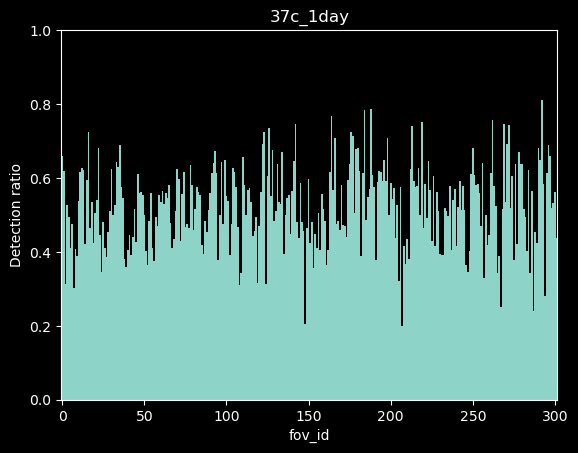

In [21]:
%matplotlib inline
fov_detection_df = pd.DataFrame.from_dict(fov_2_info, orient='index')
fov_detection_df['fov_id'] = fov_2_info.keys()
fov_detection_df['ratio'] = fov_detection_df['num_positive'] / fov_detection_df['num_total']
fov_detection_df = fov_detection_df.set_index('fov_id')

kept_fov_ratios = fov_detection_df['ratio']
plt.figure()
plt.bar(x=kept_fov_ratios.index, height=kept_fov_ratios, width=1)
plt.xlabel('fov_id')
plt.ylabel('Detection ratio')
plt.xlim([0-0.5, len(fov_detection_df)-0.5])
plt.ylim([0,1])
plt.title(os.path.basename(data_folder.strip(r'/')))
plt.show()

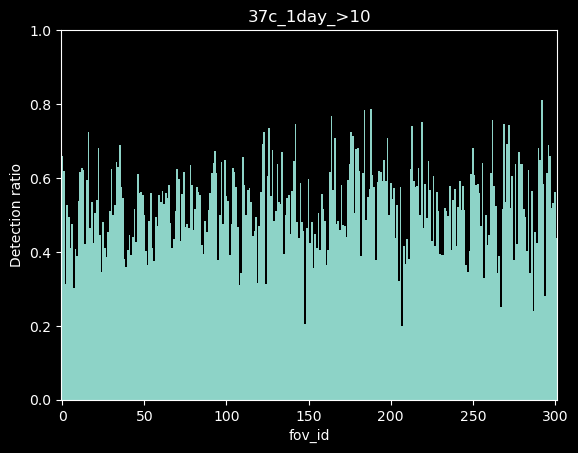

In [22]:
%matplotlib inline
fov_detection_df = pd.DataFrame.from_dict(fov_2_info, orient='index')
fov_detection_df['fov_id'] = fov_2_info.keys()
fov_detection_df['ratio'] = fov_detection_df['num_positive'] / fov_detection_df['num_total']
fov_detection_df = fov_detection_df.set_index('fov_id')

kept_fov_ratios = fov_detection_df['ratio'][fov_detection_df['num_total'] > 10]
plt.figure()
plt.bar(x=kept_fov_ratios.index, height=kept_fov_ratios, width=1)
plt.xlabel('fov_id')
plt.ylabel('Detection ratio')
plt.xlim([0-0.5, len(fov_detection_df)-0.5])
plt.ylim([0,1])
plt.title(os.path.basename(data_folder.strip(r'/'))+'_>10')
plt.show()

In [27]:

_fov_filename = os.path.join(folders[0], fovs[10])
_save_filename = _fov_filename.replace('.dax', '.hdf5')

with h5py.File(_save_filename, 'r') as _f:
    _spots_748 = Spots3D(_f['H0M1/748/spots'][:], pixel_size=[500,107,107])
    _spots_637 = Spots3D(_f['H0M1/637/spots'][:], pixel_size=[500,107,107])
    _im_748 = _f['H0M1/748/im'][:]
    _im_637 = _f['H0M1/637/im'][:]
    _dapi_im = _f['H0M1/405/im'][:]
    _dna_mask = _f['dapi_mask'][:]

<IPython.core.display.Javascript object>


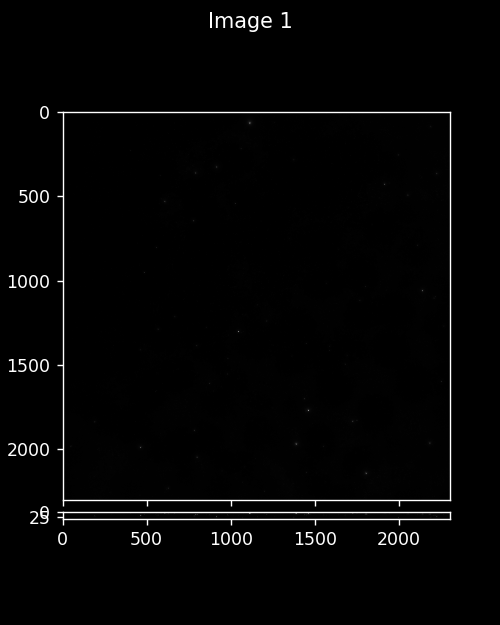

In [28]:
%matplotlib notebook
interactive.imshow_mark_3d([_im_748, _im_637, _dapi_im, _dna_mask])

<IPython.core.display.Javascript object>


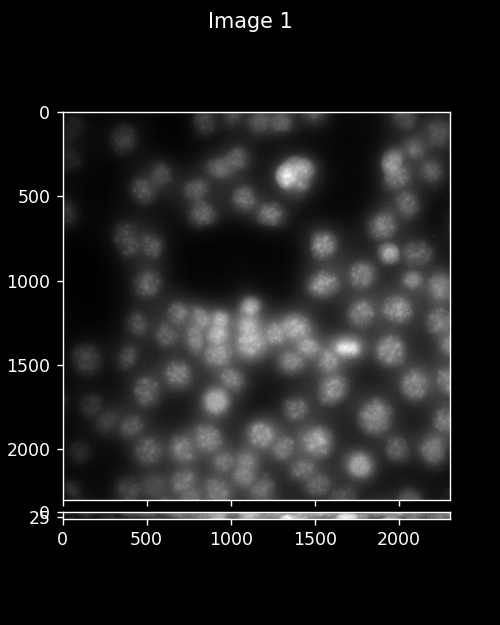

In [30]:
%matplotlib notebook
interactive.imshow_mark_3d([_dapi_im, _dna_mask])

<IPython.core.display.Javascript object>


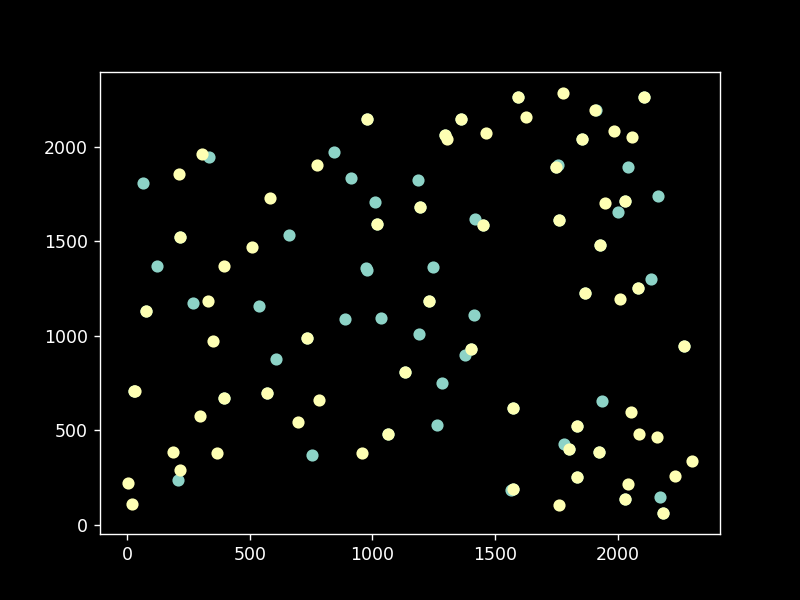

In [11]:
%matplotlib notebook
kept_spots_748, kept_spots_637 = colocalize_spots(_spots_748, _spots_637, threshold=300)
plt.figure()
plt.scatter(kept_spots_748.to_coords()[:,1], kept_spots_748.to_coords()[:,2])
plt.scatter(kept_spots_637.to_coords()[:,1], kept_spots_637.to_coords()[:,2])
plt.show()